In [6]:
import pickle as pkl
from opt.eval_policy import *
from opt.mc_sim import *
import time
from common.variables import *

filename = "output/msource_value_dic_07-06-2022-10-17-08.pkl"

with open(filename, 'rb') as f:
    output_obj = pkl.load(f)

value_dic = output_obj["state_value_dic"]
model_params = output_obj["model_params"]
sourcingEnv = output_obj["mdp_env"]

sourcingEnv2 = SourcingEnv(
    lambda_arrival = model_params['mdp_env_params']['lambda'], # or 10
    procurement_cost_vec = np.array(model_params['mdp_env_params']['procurement_cost_vec']),
    supplier_lead_times_vec = np.array(model_params['mdp_env_params']['supplier_lead_times_vec']),
    on_times = np.array([1, 1]), 
    off_times = np.array([np.Inf, np.Inf]))

s_custom = MState(stock_level = 0, 
    n_suppliers = N_SUPPLIERS, 
    n_backorders = np.array([0, 0]), 
    flag_on_off = np.array([1, 1]))

In [7]:
mc_avg_costs_di = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy,
    use_tqdm = True)

print(np.mean(np.array(mc_avg_costs_di)))
print(np.median(np.array(mc_avg_costs_di)))
print(np.std(np.array(mc_avg_costs_di)))

  5%|▌         | 1/20 [00:01<00:36,  1.95s/it]/home/larkin/code/multi-sourcing-inventory/sim/policies.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  overshoot_range = np.array([x for x in sourcingEnv.action_history_tuple if tmark_reg < x[0] < tmark_exp])
100%|██████████| 20/20 [01:21<00:00,  4.08s/it]

28.32619047619047
27.238095238095237
8.931196756885614


In [8]:
from sim.dual_index_v1 import *
mc_avg_costs_di = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy_v1,
    use_tqdm = True)

print(np.mean(np.array(mc_avg_costs_di)))
print(np.median(np.array(mc_avg_costs_di)))
print(np.std(np.array(mc_avg_costs_di)))

  5%|▌         | 1/20 [00:03<01:08,  3.60s/it]/home/larkin/code/multi-sourcing-inventory/sim/dual_index_v1.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  overshoot_range = np.array([x for x in sourcingEnv.action_history_tuple if tmark_reg < x[0] < tmark_exp])
100%|██████████| 20/20 [01:21<00:00,  4.07s/it]

25.980952380952385
26.5
4.984474762914496


In [9]:
mc_avg_costs_ss = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 100,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    use_tqdm = True)

print(np.mean(np.array(mc_avg_costs_ss)))
print(np.median(np.array(mc_avg_costs_ss)))
print(np.std(np.array(mc_avg_costs_ss)))

100%|██████████| 100/100 [00:01<00:00, 84.21it/s]

36.80548387096774
34.12903225806451
14.749845026435029


In [10]:
model_params

{'algo_params': {'prob_epsilon': 1e-08,
  'periods': 25,
  'nested_mc_iters': 26,
  'mc_episodes': 25,
  'max_steps': 40,
  'explore_eps': 0.05,
  'debug_bool': 0,
  'fixed_learn_rate': 0.1},
 'policy_params': {'h_cost': 2,
  'b_penalty': 10,
  'small_s': 0,
  'big_s': 1,
  'n_suppliers': 2,
  'backorder_max': -10,
  'inven_limit': 30},
 'mdp_env_params': {'lambda': 50,
  'max_inven': 30,
  'action_size': 4,
  'discount_fac': 1.0,
  'procurement_cost_vec': [25, 5],
  'supplier_lead_times_vec': [0.08, 0.4],
  'on_times': [1, 1],
  'off_times': 'no_disrup'},
 'eval_params': {'safe_factor': 1.1,
  'n_visit_limit': 2,
  'sub_eval_periods': 30,
  'sub_nested_mc_iter': 30},
 'dual_index': {'di_safety_factor1': 5, 'delta_cand_range1': 20},
 'git_commit': '111729923ac799295dcc8b923bbc46e0c937389e',
 'branch_name': 'larkin/conf-refac'}

In [11]:
model_params

{'algo_params': {'prob_epsilon': 1e-08,
  'periods': 25,
  'nested_mc_iters': 26,
  'mc_episodes': 25,
  'max_steps': 40,
  'explore_eps': 0.05,
  'debug_bool': 0,
  'fixed_learn_rate': 0.1},
 'policy_params': {'h_cost': 2,
  'b_penalty': 10,
  'small_s': 0,
  'big_s': 1,
  'n_suppliers': 2,
  'backorder_max': -10,
  'inven_limit': 30},
 'mdp_env_params': {'lambda': 50,
  'max_inven': 30,
  'action_size': 4,
  'discount_fac': 1.0,
  'procurement_cost_vec': [25, 5],
  'supplier_lead_times_vec': [0.08, 0.4],
  'on_times': [1, 1],
  'off_times': 'no_disrup'},
 'eval_params': {'safe_factor': 1.1,
  'n_visit_limit': 2,
  'sub_eval_periods': 30,
  'sub_nested_mc_iter': 30},
 'dual_index': {'di_safety_factor1': 5, 'delta_cand_range1': 20},
 'git_commit': '111729923ac799295dcc8b923bbc46e0c937389e',
 'branch_name': 'larkin/conf-refac'}

In [12]:
output_obj

{'state_value_dic': {'[-1, 0, 0, 1, 1]': (-119.26928438231901, 58),
  '[0, 0, 0, 0, 1]': (-36.10362405211876, 234),
  '[0, 0, 0, 1, 0]': (-61.452610849941564, 273),
  '[-1, 0, 1, 1, 1]': (-2143.436130052633, 70),
  '[0, 0, 1, 1, 1]': (-784.6497322035275, 95),
  '[0, 0, 1, 0, 1]': (-35.05944245703372, 359),
  '[0, 0, 1, 1, 0]': (-33.40861538461539, 34),
  '[-1, 0, 2, 1, 1]': (-1072.2574138821421, 79),
  '[0, 0, 2, 1, 1]': (-56.12591812427584, 96),
  '[0, 0, 2, 0, 1]': (-34.877566428453285, 396),
  '[0, 0, 2, 1, 0]': (-33.639918461538464, 42),
  '[-1, 0, 3, 1, 1]': (-53.22641180431824, 81),
  '[0, 0, 3, 1, 1]': (-32.93401784615385, 88),
  '[0, 0, 3, 0, 1]': (-33.06550323697446, 395),
  '[0, 0, 3, 1, 0]': (-36.29657671851107, 72),
  '[-1, 0, 4, 1, 1]': (-35.21871654660526, 75),
  '[0, 0, 4, 1, 1]': (-33.43754261538462, 88),
  '[0, 0, 4, 0, 1]': (-33.80032846407396, 395),
  '[0, 0, 4, 1, 0]': (-33.35787173846154, 42),
  '[-1, 0, 5, 1, 1]': (-34.324716184615376, 74),
  '[0, 0, 5, 1, 1]': (-

In [13]:
# best_small_s, best_big_s, best_val = find_opt_ss_policy_via_mc(sourcingEnv, periods = 20, nested_mc_iters = 50)
# best (s, S) policy found by MC:: (2, 5)

In [14]:
# model_params['branch_name'], model_params['git_commit']

In [15]:
# sourcingEnv = SourcingEnv(
#         lambda_arrival = 8, # or 10
#         procurement_cost_vec = np.array([3, 1, 2]),
#         supplier_lead_times_vec = np.array([0.8, 0.5, 1.0]),
#         on_times = np.array([1, 1, 2]), 
#         off_times = np.array([0.3, 1, 0.2]))

# Dual Sourcing
# sourcingEnv = SourcingEnv(
#         lambda_arrival = LAMBDA, # or 10
#         procurement_cost_vec = np.array([3, 1]),
#         supplier_lead_times_vec = np.array([0.8, 0.5]),
#         on_times = np.array([1, 1]), 
#         off_times = np.array([0.3, 1]))



# mc_avg_costs_ss = mc_with_policy(sourcingEnv2, start_state = s_custom, 
#     periods = 30,
#     nested_mc_iters = 100,
#     big_s = model_params['policy_params']['big_s'],
#     small_s = model_params['policy_params']['small_s'],
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'],
#     use_tqdm = True)

# print(np.mean(np.array(mc_avg_costs_ss)))

In [16]:
# mc_avg_costs = mc_with_ss_policy(sourcingEnv, 
#     periods = 100,
#     nested_mc_iters = 50,
#     big_s = 5,
#     small_s = 2,
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'])

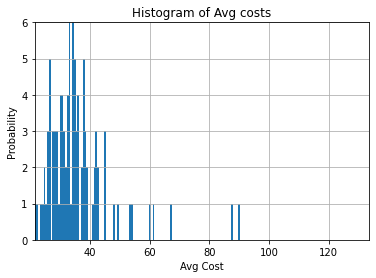

In [17]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.6
n, bins, patches = plt.hist(mc_avg_costs_ss, bins=np.arange( np.min(mc_avg_costs_ss), np.max(mc_avg_costs_ss) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs_ss), np.max(mc_avg_costs_ss))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [18]:
print(np.mean(np.array(mc_avg_costs_ss)))

36.80548387096774


In [19]:
print(np.median(np.array(mc_avg_costs_ss)))

34.12903225806451


In [20]:
np.std(np.array(mc_avg_costs_ss))

14.749845026435029

In [30]:
myopic_cost = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=myopic2_policy,
    use_tqdm = True)

 55%|█████▌    | 11/20 [00:47<00:44,  4.98s/it]

In [ ]:
np.mean(myopic_cost)

22.195238095238096

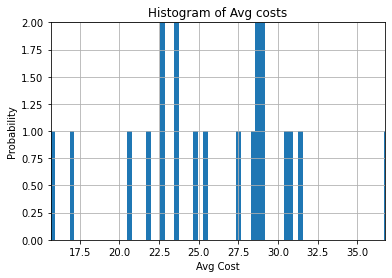

In [23]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.3
n, bins, patches = plt.hist(mc_avg_costs_di, bins=np.arange( np.min(mc_avg_costs_di), np.max(mc_avg_costs_di) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs_di), np.max(mc_avg_costs_di))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [24]:
single_supplier_mean_costs = []
for s in range(sourcingEnv2.n_suppliers):

    kwargs = {"periods" : 30,
        "nested_mc_iters" : 30,
        "h_cost": model_params['policy_params']['h_cost'],
        "b_penalty" : model_params['policy_params']['b_penalty'],
        "supplier_index": s
    }

    single_supplier_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
        use_tqdm = True,
        policy_callback = single_source_orderupto_policy,
        **kwargs)
    
    single_supplier_mean_costs.append(np.mean(single_supplier_costs))


100%|██████████| 30/30 [00:05<00:00,  5.28it/s]


In [25]:
single_supplier_mean_costs

[53.737634408602155, 34.48924731182795]

In [26]:
np.min(single_supplier_mean_costs)

34.48924731182795

In [27]:
kwargs = {
    "value_dic": value_dic, 
    "periods": 10, 
    "periods_val_it": 1,
    "nested_mc_iters": 30,
    "max_stock": BIG_S,
    "discount_fac": DISCOUNT_FAC,
    "h_cost": model_params['policy_params']['h_cost'],
    "b_penalty": model_params['policy_params']['b_penalty'],
    "n_visit_lim": N_VISIT_LIM,
    "default_ss_policy": ss_policy_fastest_supp_backlog,
    "safe_factor": SAFE_FACTOR,
    "sub_eval_periods": SUB_EVAL_PERIODS,
    "sub_nested_mc_iter": SUB_NESTED_MC_ITER,
    "max_stock": 2,
    "approx_eval": True
}

mc_avg_costs = mc_with_policy(sourcingEnv2, 
    start_state = s_custom, 
    use_tqdm = True,
    policy_callback = eval_policy_from_value_dic,
    **kwargs)

100%|██████████| 30/30 [05:37<00:00, 11.24s/it]


In [28]:
np.mean(mc_avg_costs)

33.52727272727273

In [29]:
mc_avg_costs

[32.72727272727273,
 36.36363636363637,
 32.18181818181818,
 32.90909090909091,
 40.90909090909091,
 32.18181818181818,
 33.72727272727273,
 33.63636363636363,
 32.18181818181818,
 32.0,
 34.54545454545455,
 34.09090909090909,
 32.0,
 32.90909090909091,
 33.81818181818182,
 34.36363636363637,
 35.63636363636363,
 32.18181818181818,
 41.45454545454545,
 32.18181818181818,
 34.27272727272727,
 21.09090909090909,
 32.90909090909091,
 36.72727272727273,
 32.81818181818182,
 32.90909090909091,
 33.63636363636363,
 32.18181818181818,
 33.81818181818182,
 33.45454545454545]